In [2]:
import pandas as pd

# load training data
training_data = pd.read_csv("c3_data-points.csv")

# print shape
print("Shape:", training_data.shape)

Shape: (50, 2)


In [3]:
training_data.head()

,x,y
0,0.000,0.706
1,0.128,0.288
2,0.256,0.645
3,0.385,1.272
4,0.513,1.238


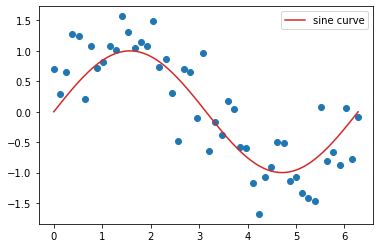

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

# extract x, y data (using x & y rather than x_tr, y_tr for simplicity)
x = training_data.x.values
y = training_data.y.values

# plot data points 
plt.scatter(x, y)
            
# plot sine curve for reference
x_values = np.linspace(min(x), max(x), num=100)
y_sine = np.sin(x_values)
plt.plot(x_values, y_sine, c="C3", label="sine curve")
plt.legend()
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# create polynomial features
poly_obj = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_obj.fit_transform(x[:, np.newaxis])

print("Shape:", X_poly.shape)
print("Features:", poly_obj.get_feature_names_out())

Shape: (50, 10)
Features: ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X_poly)

In [12]:
# verify data is standardised (mean close to zero and std 1)

X_rescaled.mean(axis=0)

array([ 1.77635684e-16,  2.66453526e-16, -1.68753900e-16, -8.88178420e-18,
       -7.99360578e-17,  8.88178420e-18, -1.77635684e-17, -1.77635684e-17,
        4.44089210e-17,  1.06581410e-16])

In [14]:
X_rescaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
# now fit linear regression 

from sklearn.linear_model import LinearRegression

# linear regression
lr = LinearRegression()
lr.fit(X_rescaled, y)

# pass sample x values through preprocessing steps
X_values_rescaled = scaler.transform(poly_obj.transform(x_values[:, np.newaxis]))
y_values_lr = lr.predict(X_values_rescaled)

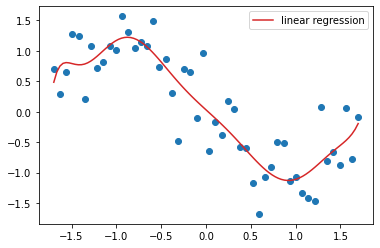

In [20]:
# plot model
plt.scatter(X_rescaled[:,0], y)
plt.plot(X_values_rescaled[:, 0], y_values_lr, c="C3", label="linear regression")
plt.legend()
plt.show()

In [21]:
from sklearn.linear_model import Ridge

# ridge regression
ridge = Ridge()
ridge.fit(X_rescaled, y)

# compute predictions
y_values_ridge = ridge.predict(X_values_rescaled)

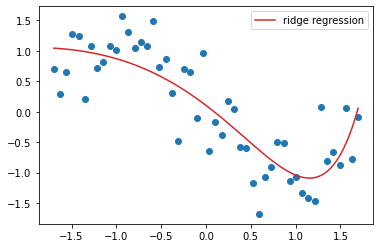

In [22]:
# plot model
plt.scatter(X_rescaled[:,0], y)
plt.plot(X_values_rescaled[:, 0], y_values_ridge, c="C3", label="ridge regression")
plt.legend()
plt.show()

In [24]:
# by default ridge regularisation strength is 1, change it with alpha 

ridge2 = Ridge(alpha=1e-4)
ridge2.fit(X_rescaled, y)

# compute predictions
y_values_ridge2 = ridge2.predict(X_values_rescaled)

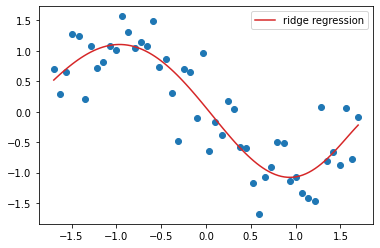

In [25]:
# plot model
plt.scatter(X_rescaled[:,0], y)
plt.plot(X_values_rescaled[:, 0], y_values_ridge2, c="C3", label="ridge regression")
plt.legend()
plt.show()

In [27]:
# compare coefficients before and after adding reg term

# linear regression coefs
features = poly_obj.get_feature_names_out()
for feature, coef in zip(features, lr.coef_):
    print("{:<6}: {:>10.1f}".format(feature, coef))

x0    :        6.3
x0^2  :     -156.5
x0^3  :     1604.8
x0^4  :    -8250.8
x0^5  :    24145.5
x0^6  :   -42951.3
x0^7  :    47245.0
x0^8  :   -31285.6
x0^9  :    11373.1
x0^10 :    -1731.0


In [28]:
# ridge regression coefs
for feature, coef in zip(features, ridge2.coef_):
    print("{:<6}: {:>10.1f}".format(feature, coef))

x0    :        1.4
x0^2  :       -1.6
x0^3  :       -6.8
x0^4  :        3.9
x0^5  :        4.5
x0^6  :        0.5
x0^7  :       -1.7
x0^8  :       -1.1
x0^9  :        0.2
x0^10 :        0.1


In [29]:
from sklearn.linear_model import Lasso

# Lasso regression
lasso = Lasso(alpha=1e-4, max_iter=1e5)
lasso.fit(X_rescaled, y)

# Compute predictions
y_values_lasso = lasso.predict(X_values_rescaled)

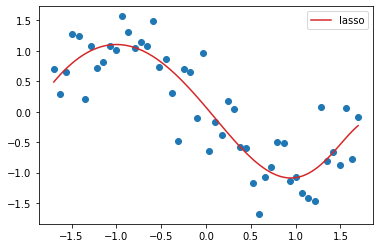

In [30]:
# plot model
plt.scatter(X_rescaled[:,0], y)
plt.plot(X_values_rescaled[:, 0], y_values_lasso, c="C3", label="lasso")
plt.legend()
plt.show()

In [31]:
# Lasso regression coefs
for feature, coef in zip(features, lasso.coef_):
    print("{:<6}: {:>10.1f}".format(feature, coef))

x0    :        1.8
x0^2  :       -4.4
x0^3  :       -0.2
x0^4  :        0.0
x0^5  :        2.2
x0^6  :        0.9
x0^7  :        0.0
x0^8  :        0.0
x0^9  :       -0.0
x0^10 :       -0.7
